In [44]:
import torch
print("PyTorch Version:", torch.__version__)
print("CUDA Available:", torch.cuda.is_available())

if torch.cuda.is_available():
    print("GPU Name:", torch.cuda.get_device_name(0))
    print("CUDA Version:", torch.version.cuda)


PyTorch Version: 2.5.1+cu121
CUDA Available: True
GPU Name: NVIDIA GeForce RTX 3060
CUDA Version: 12.1


   set_id  gender  age country
0       0  FEMALE   36      RU
1       1  FEMALE   37      RU
2       2  FEMALE   36      RU
3       3    MALE   29      RU
4       4  FEMALE   43      RU
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   set_id   19 non-null     int64 
 1   gender   19 non-null     object
 2   age      19 non-null     int64 
 3   country  19 non-null     object
dtypes: int64(2), object(2)
memory usage: 736.0+ bytes
None


C:\Users\ASUS\AppData\Local\Temp\ipykernel_25156\2144067700.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="gender", data=df, palette="coolwarm")


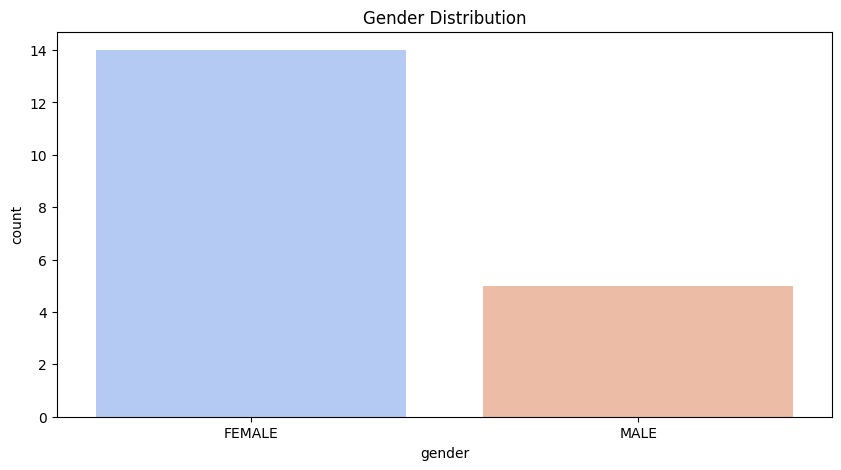

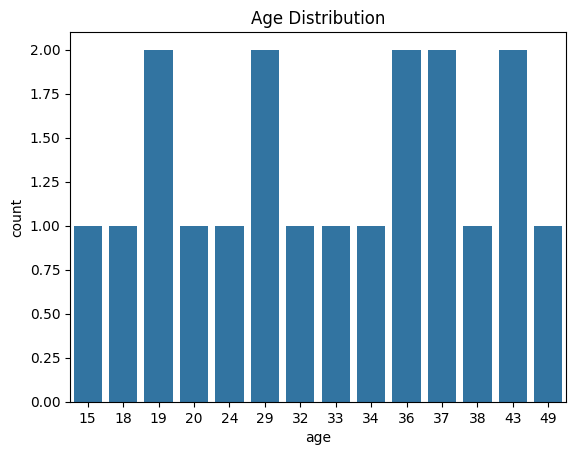

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV file
df = pd.read_csv("C:/Users/ASUS\FacialEmo/emotions.csv")

# Display first few rows
print(df.head())

# Check dataset summary
print(df.info())

# Check class distribution
plt.figure(figsize=(10,5))
sns.countplot(x="gender", data=df, palette="coolwarm")
plt.title("Gender Distribution")
plt.show()

sns.countplot(x="age", data=df)
plt.title("Age Distribution")
plt.show()


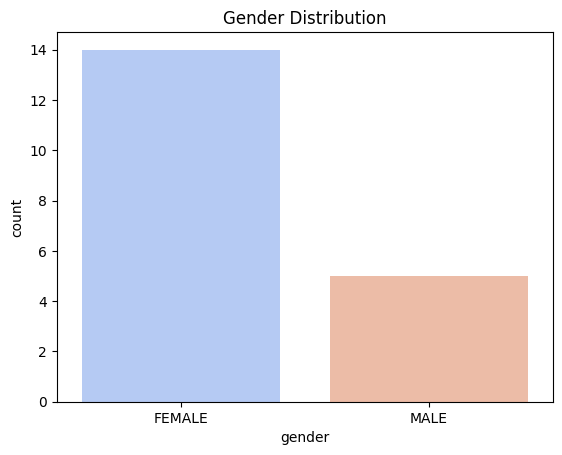

In [46]:
sns.countplot(x="gender", data=df, hue="gender", palette="coolwarm", legend=False)
plt.title("Gender Distribution")
plt.show()


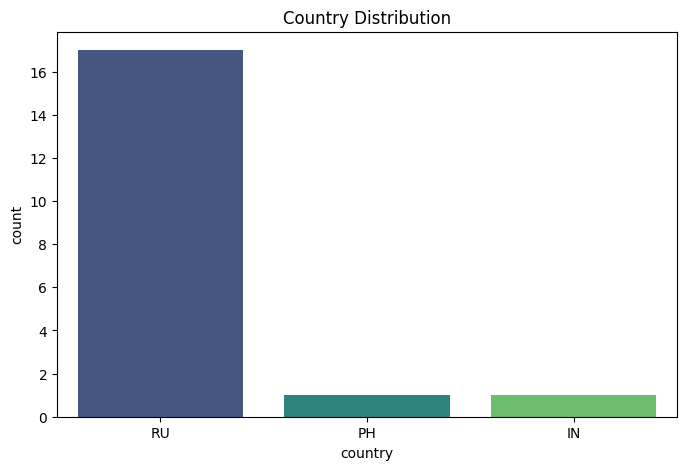

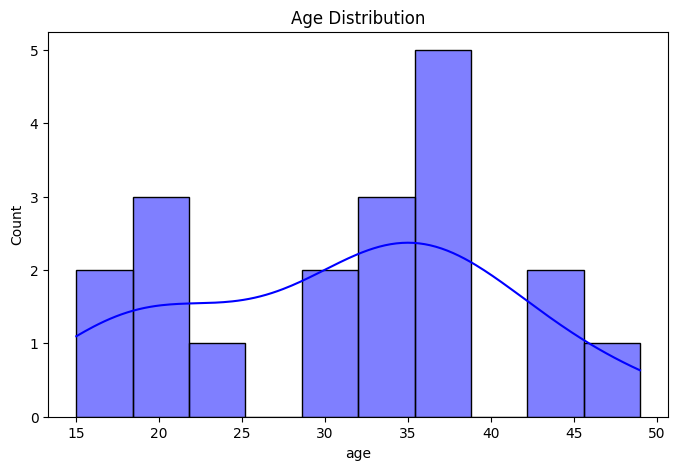

In [47]:
# Check country distribution
plt.figure(figsize=(8,5))
sns.countplot(x="country", data=df, hue="country", palette="viridis", legend=False)
plt.title("Country Distribution")
plt.show()

# Check age distribution
plt.figure(figsize=(8,5))
sns.histplot(df["age"], bins=10, kde=True, color="blue")
plt.title("Age Distribution")
plt.show()


In [48]:
print(df.columns)  # Check if emotion labels exist


Index(['set_id', 'gender', 'age', 'country'], dtype='object')


In [49]:
import os

image_folder = "C:/Users/ASUS/FacialEmo/images/"
sample_images = os.listdir(image_folder)[:10]  # Show first 10 images
print("Sample Image Names:", sample_images)


Sample Image Names: ['0', '1', '10', '11', '12', '13', '14', '15', '16', '17']


In [50]:
import os

image_folder = "C:/Users/ASUS/FacialEmo/images/"

# List folders inside the main image directory
folders = os.listdir(image_folder)
print("Folders in Image Directory:", folders)

# Check a few sample images inside one of the folders
sample_folder = os.path.join(image_folder, folders[0])  # Pick the first folder
sample_images = os.listdir(sample_folder)[:5]  # Show first 5 images
print(f"Sample Images inside '{folders[0]}':", sample_images)


Folders in Image Directory: ['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '2', '3', '4', '5', '6', '7', '8', '9']
Sample Images inside '0': ['Anger.jpg', 'Contempt.jpg', 'Disgust.jpg', 'Fear.jpg', 'Happy.jpg']


In [51]:
import os
import pandas as pd

# Define image directory path
image_folder = "C:/Users/ASUS/FacialEmo/images/"

# List to store image data
data = []

# Loop through each set_id folder
for set_id in os.listdir(image_folder):
    set_path = os.path.join(image_folder, set_id)
    
    # Check if it's a valid folder
    if os.path.isdir(set_path):
        # Loop through images inside the folder
        for image_name in os.listdir(set_path):
            if image_name.endswith(".jpg"):  # Ensure it's an image
                emotion = image_name.split(".")[0]  # Extract emotion from filename
                image_path = os.path.join(set_path, image_name)
                data.append([set_id, emotion, image_path])

# Convert to DataFrame
df_images = pd.DataFrame(data, columns=["set_id", "emotion", "image_path"])
print(df_images.head())  # Display first few rows


  set_id   emotion                                     image_path
0      0     Anger     C:/Users/ASUS/FacialEmo/images/0\Anger.jpg
1      0  Contempt  C:/Users/ASUS/FacialEmo/images/0\Contempt.jpg
2      0   Disgust   C:/Users/ASUS/FacialEmo/images/0\Disgust.jpg
3      0      Fear      C:/Users/ASUS/FacialEmo/images/0\Fear.jpg
4      0     Happy     C:/Users/ASUS/FacialEmo/images/0\Happy.jpg


In [52]:
# Load the emotions.csv metadata
df_metadata = pd.read_csv("C:/Users/ASUS/FacialEmo/emotions.csv")

# Merge on 'set_id' (converting to string to ensure proper merging)
df_metadata["set_id"] = df_metadata["set_id"].astype(str)  # Convert to string
df_images["set_id"] = df_images["set_id"].astype(str)

# Perform the merge
df_final = pd.merge(df_images, df_metadata, on="set_id", how="left")

# Display merged dataset
print(df_final.head())


  set_id   emotion                                     image_path  gender  \
0      0     Anger     C:/Users/ASUS/FacialEmo/images/0\Anger.jpg  FEMALE   
1      0  Contempt  C:/Users/ASUS/FacialEmo/images/0\Contempt.jpg  FEMALE   
2      0   Disgust   C:/Users/ASUS/FacialEmo/images/0\Disgust.jpg  FEMALE   
3      0      Fear      C:/Users/ASUS/FacialEmo/images/0\Fear.jpg  FEMALE   
4      0     Happy     C:/Users/ASUS/FacialEmo/images/0\Happy.jpg  FEMALE   

   age country  
0   36      RU  
1   36      RU  
2   36      RU  
3   36      RU  
4   36      RU  


C:\Users\ASUS\AppData\Local\Temp\ipykernel_25156\4270049818.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="emotion", data=df_final, palette="coolwarm", order=df_final["emotion"].value_counts().index)


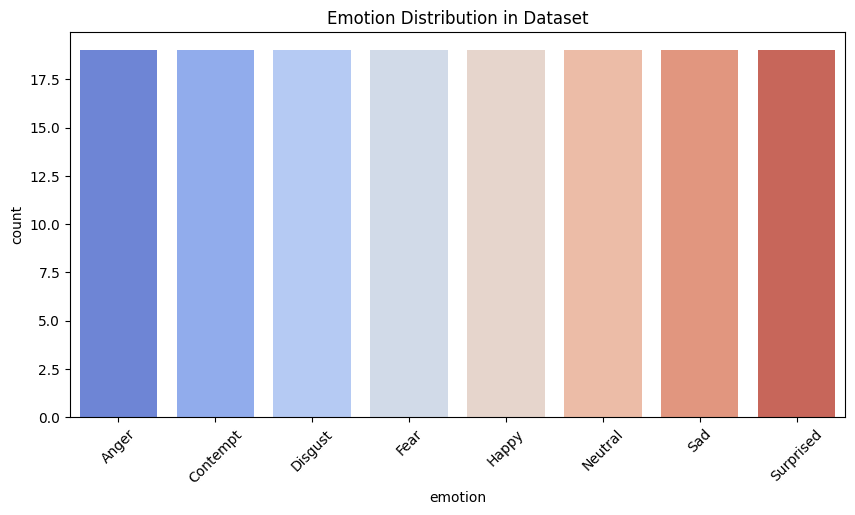

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot for emotions
plt.figure(figsize=(10,5))
sns.countplot(x="emotion", data=df_final, palette="coolwarm", order=df_final["emotion"].value_counts().index)
plt.title("Emotion Distribution in Dataset")
plt.xticks(rotation=45)
plt.show()


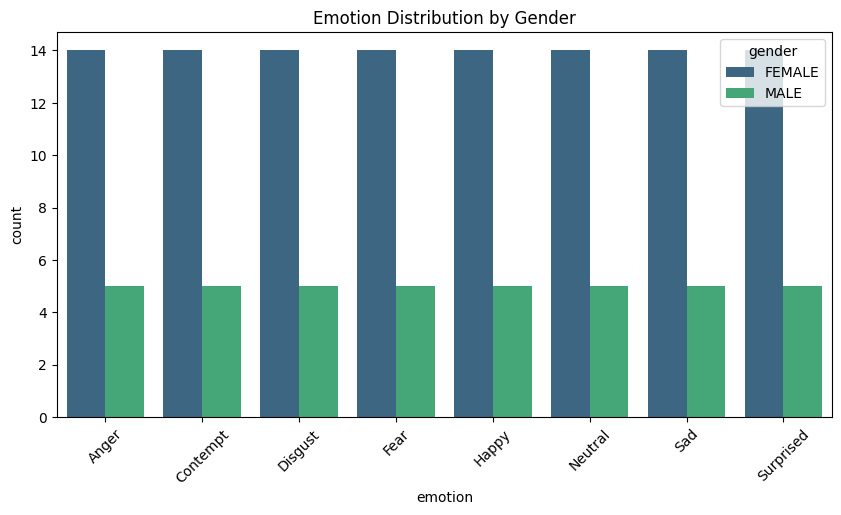

In [54]:
plt.figure(figsize=(10,5))
sns.countplot(x="emotion", hue="gender", data=df_final, palette="viridis")
plt.title("Emotion Distribution by Gender")
plt.xticks(rotation=45)
plt.show()


In [55]:
import os
import cv2
import numpy as np
import albumentations as A
from tqdm import tqdm
import pandas as pd

# Define augmentation pipeline
augmentations = A.Compose([
    A.HorizontalFlip(p=0.5),  # Flip image horizontally
    A.Rotate(limit=20, p=0.5),  # Rotate image (-20 to +20 degrees)
    A.RandomBrightnessContrast(p=0.5),  # Adjust brightness/contrast
    A.GaussNoise(p=0.3)  # Add Gaussian noise
])

# Load dataset
df_augmented = df_final.copy()
output_folder = "C:/Users/ASUS/FacialEmo/augmented_images/"

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Augment only male images
new_data = []
for index, row in tqdm(df_final.iterrows(), total=len(df_final)):
    if row["gender"] == "MALE":  # Only augment males
        img_path = row["image_path"]
        img = cv2.imread(img_path)

        if img is None:
            continue

        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        for i in range(2):  # Generate 2 new images per male sample
            augmented = augmentations(image=img)["image"]
            new_img_name = f"{row['set_id']}_{row['emotion']}_aug{i}.jpg"
            new_img_path = os.path.join(output_folder, new_img_name)
            
            cv2.imwrite(new_img_path, cv2.cvtColor(augmented, cv2.COLOR_RGB2BGR))  # Save new image
            
            new_data.append([row["set_id"], row["emotion"], new_img_path, row["gender"], row["age"], row["country"]])

# Convert augmented data to DataFrame and merge with original dataset
df_aug = pd.DataFrame(new_data, columns=df_final.columns)
df_balanced = pd.concat([df_final, df_aug], ignore_index=True)

# Save updated dataset
df_balanced.to_csv("C:/Users/ASUS/FacialEmo/augmented_emotions.csv", index=False)

print("✅ Augmentation Complete! New dataset size:", df_balanced.shape)


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 152/152 [00:15<00:00,  9.91it/s]

✅ Augmentation Complete! New dataset size: (232, 6)


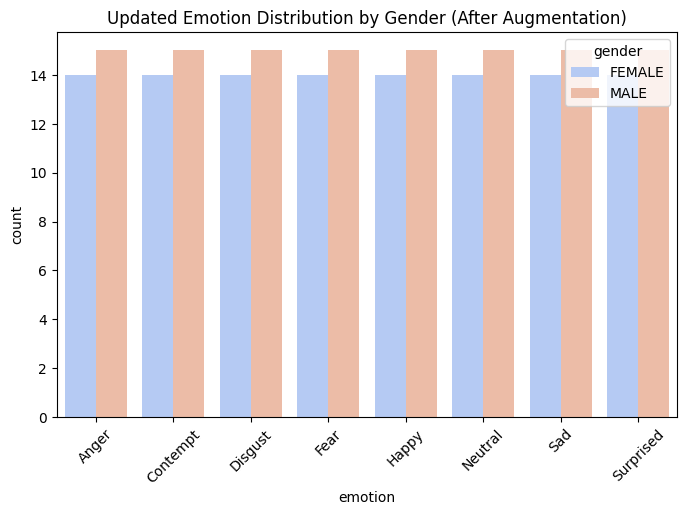

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(x="emotion", hue="gender", data=df_balanced, palette="coolwarm")
plt.title("Updated Emotion Distribution by Gender (After Augmentation)")
plt.xticks(rotation=45)
plt.show()


Sample Emotion Index: 0


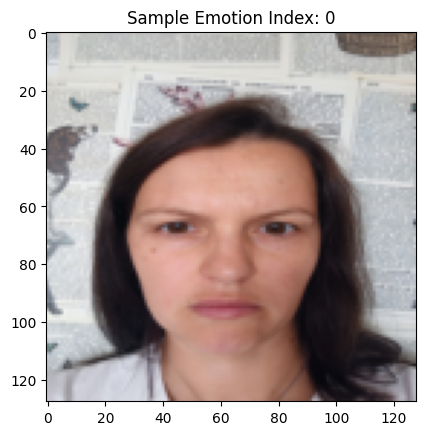

In [57]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image

# Define transformations for image preprocessing
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize all images
    transforms.ToTensor(),  # Convert to PyTorch tensor
    transforms.Normalize((0.5,), (0.5,))  # Normalize pixel values
])

# Emotion label encoding (convert text labels to numbers)
emotion_to_idx = {emotion: idx for idx, emotion in enumerate(df_balanced["emotion"].unique())}
df_balanced["emotion_idx"] = df_balanced["emotion"].map(emotion_to_idx)

# Custom PyTorch Dataset class
class EmotionDataset(Dataset):
    def __init__(self, df):
        self.df = df

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        img_path = row["image_path"]
        emotion = row["emotion_idx"]

        # Load and preprocess image
        image = Image.open(img_path).convert("RGB")
        image = transform(image)

        return image, torch.tensor(emotion, dtype=torch.long)

# Create dataset & dataloaders
dataset = EmotionDataset(df_balanced)
train_loader = DataLoader(dataset, batch_size=32, shuffle=True)

# Check sample image
sample_img, sample_label = dataset[0]
print(f"Sample Emotion Index: {sample_label}")
# Denormalize before displaying
denorm_img = sample_img * 0.5 + 0.5  # Reverse normalization
plt.imshow(denorm_img.permute(1, 2, 0))
plt.title(f"Sample Emotion Index: {sample_label}")
plt.show()


In [58]:
import torch.nn.functional as F

# Define CNN Model
class EmotionCNN(nn.Module):
    def __init__(self, num_classes):
        super(EmotionCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 32 * 32, 128)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)  # Flatten
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize model
num_classes = len(emotion_to_idx)  # Number of unique emotions
model = EmotionCNN(num_classes).to("cuda")

# Define Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

print("✅ CNN Model Initialized Successfully!")


✅ CNN Model Initialized Successfully!


In [59]:
# Training the CNN Model
num_epochs = 10  # Number of training epochs

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to("cuda"), labels.to("cuda")  # Move data to GPU

        optimizer.zero_grad()
        outputs = model(images)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights

        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader):.4f}")

print("✅ Model Training Completed! 🎉")


Epoch 1/10, Loss: 2.7193
Epoch 2/10, Loss: 2.0837
Epoch 3/10, Loss: 2.0798
Epoch 4/10, Loss: 2.0793
Epoch 5/10, Loss: 2.0799
Epoch 6/10, Loss: 2.0815
Epoch 7/10, Loss: 2.0789
Epoch 8/10, Loss: 2.0774
Epoch 9/10, Loss: 2.0664
Epoch 10/10, Loss: 2.0567
✅ Model Training Completed! 🎉


In [60]:
# Evaluation Mode
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in train_loader:
        images, labels = images.to("cuda"), labels.to("cuda")
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"✅ Model Accuracy: {accuracy:.2f}%")


✅ Model Accuracy: 26.29%


In [18]:
# Create separate datasets for Male & Female
df_male = df_balanced[df_balanced["gender"] == "MALE"]
df_female = df_balanced[df_balanced["gender"] == "FEMALE"]

# Initialize accuracy tracking
male_correct = 0
male_total = 0
female_correct = 0
female_total = 0

# Model Evaluation
model.eval()
with torch.no_grad():
    for index, row in df_balanced.iterrows():
        image = Image.open(row["image_path"]).convert("RGB")
        image = transform(image).unsqueeze(0).to("cuda")  # Apply transformations & move to GPU
        label = torch.tensor(row["emotion_idx"]).to("cuda")

        output = model(image)
        _, predicted = torch.max(output, 1)

        # Track Male & Female accuracies separately
        if row["gender"] == "MALE":
            male_total += 1
            if predicted.item() == label.item():
                male_correct += 1
        else:
            female_total += 1
            if predicted.item() == label.item():
                female_correct += 1

# Compute accuracy per gender
male_acc = 100 * male_correct / male_total
female_acc = 100 * female_correct / female_total

print(f"✅ Model Accuracy for Males: {male_acc:.2f}%")
print(f"✅ Model Accuracy for Females: {female_acc:.2f}%")


✅ Model Accuracy for Males: 70.83%
✅ Model Accuracy for Females: 50.00%


In [20]:
import albumentations as A
import cv2
import os
import numpy as np
from tqdm import tqdm

# Stronger augmentations for Female images
strong_aug = A.Compose([
    A.HorizontalFlip(p=0.7),
    A.Rotate(limit=30, p=0.7),
    A.RandomBrightnessContrast(p=0.7),
    A.GaussNoise(p=0.5),
    A.MotionBlur(p=0.5),
    A.ElasticTransform(p=0.3)
])

output_folder = "C:/Users/ASUS/FacialEmo/augmented_female_images/"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

new_data = []
for index, row in tqdm(df_balanced.iterrows(), total=len(df_balanced)):
    if row["gender"] == "FEMALE":  # Augment females only
        img_path = row["image_path"]
        img = cv2.imread(img_path)

        if img is None:
            continue

        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        for i in range(3):  # Generate 3 new images per female sample
            augmented = strong_aug(image=img)["image"]
            new_img_name = f"{row['set_id']}_{row['emotion']}_aug{i}.jpg"
            new_img_path = os.path.join(output_folder, new_img_name)
            
            cv2.imwrite(new_img_path, cv2.cvtColor(augmented, cv2.COLOR_RGB2BGR))
            new_data.append([row["set_id"], row["emotion"], new_img_path, row["gender"], row["age"], row["country"]])

df_female_aug = pd.DataFrame(new_data, columns=["set_id", "emotion", "image_path", "gender", "age", "country"])

df_balanced_v2 = pd.concat([df_balanced, df_female_aug], ignore_index=True)

print("✅ Stronger Female Augmentation Applied! New dataset size:", df_balanced_v2.shape)


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 232/232 [02:28<00:00,  1.56it/s]

✅ Stronger Female Augmentation Applied! New dataset size: (568, 7)


In [29]:
# Ensure 'emotion_idx' is numeric and remove invalid values
df_balanced["emotion_idx"] = pd.to_numeric(df_balanced["emotion_idx"], errors="coerce")

# Drop any NaN values (which may be causing the error)
df_balanced = df_balanced.dropna(subset=["emotion_idx"]).reset_index(drop=True)

# Convert 'emotion_idx' to integer format
df_balanced["emotion_idx"] = df_balanced["emotion_idx"].astype(int)

print("✅ Emotion labels successfully converted to integers!")


✅ Emotion labels successfully converted to integers!


In [30]:
# Load the newly balanced dataset
df_balanced = df_balanced_v2.copy()

# Create dataset & dataloaders
dataset = EmotionDataset(df_balanced)
train_loader = DataLoader(dataset, batch_size=32, shuffle=True)

# Reinitialize Model, Optimizer & Loss Function
model = EmotionCNN(num_classes).to("cuda")
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Training Loop (10 epochs)
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to("cuda"), labels.to("cuda")

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader):.4f}")

print("✅ Model Training Completed with Balanced Dataset! 🎉")


RuntimeError: value cannot be converted to type int64 without overflow

In [31]:
# Check unique values in emotion_idx
print("Unique emotion indices:", df_balanced["emotion_idx"].unique())

# Check for NaN values
print("NaN count in emotion_idx:", df_balanced["emotion_idx"].isna().sum())

# Check if any values are not integers
non_integer_values = df_balanced[~df_balanced["emotion_idx"].apply(lambda x: isinstance(x, int))]
print("Non-integer values in emotion_idx:\n", non_integer_values)


Unique emotion indices: [ 0.  1.  2.  3.  4.  5.  6.  7. nan]
NaN count in emotion_idx: 336
Non-integer values in emotion_idx:
     set_id    emotion                                         image_path  \
0        0      Anger         C:/Users/ASUS/FacialEmo/images/0\Anger.jpg   
1        0   Contempt      C:/Users/ASUS/FacialEmo/images/0\Contempt.jpg   
2        0    Disgust       C:/Users/ASUS/FacialEmo/images/0\Disgust.jpg   
3        0       Fear          C:/Users/ASUS/FacialEmo/images/0\Fear.jpg   
4        0      Happy         C:/Users/ASUS/FacialEmo/images/0\Happy.jpg   
..     ...        ...                                                ...   
563      9        Sad  C:/Users/ASUS/FacialEmo/augmented_female_image...   
564      9        Sad  C:/Users/ASUS/FacialEmo/augmented_female_image...   
565      9  Surprised  C:/Users/ASUS/FacialEmo/augmented_female_image...   
566      9  Surprised  C:/Users/ASUS/FacialEmo/augmented_female_image...   
567      9  Surprised  C:/Users/ASUS

In [32]:
# Convert emotion_idx to numeric, forcing errors to NaN
df_balanced["emotion_idx"] = pd.to_numeric(df_balanced["emotion_idx"], errors="coerce")

# Drop any NaN values
df_balanced = df_balanced.dropna(subset=["emotion_idx"]).reset_index(drop=True)

# Convert to integer
df_balanced["emotion_idx"] = df_balanced["emotion_idx"].astype(int)

# Verify conversion
print("✅ Cleaned emotion_idx values:", df_balanced["emotion_idx"].unique())


✅ Cleaned emotion_idx values: [0 1 2 3 4 5 6 7]


In [33]:
# Train Model
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to("cuda"), labels.to("cuda")

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader):.4f}")

print("✅ Model Training Completed Successfully! 🎉")


RuntimeError: value cannot be converted to type int64 without overflow

In [34]:
# Check unique values in emotion_idx
print("Unique emotion indices:", df_balanced["emotion_idx"].unique())

# Check if there are NaN values
print("NaN count in emotion_idx:", df_balanced["emotion_idx"].isna().sum())

# Check if all values are integers
invalid_rows = df_balanced[~df_balanced["emotion_idx"].apply(lambda x: isinstance(x, (int, np.integer)))]
print("Invalid values in emotion_idx:\n", invalid_rows)


Unique emotion indices: [0 1 2 3 4 5 6 7]
NaN count in emotion_idx: 0
Invalid values in emotion_idx:
 Empty DataFrame
Columns: [set_id, emotion, image_path, gender, age, country, emotion_idx]
Index: []


In [35]:
# Modify Dataset Class for Debugging
class EmotionDataset(Dataset):
    def __init__(self, df):
        self.df = df

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        img_path = row["image_path"]
        emotion = row["emotion_idx"]

        # Debugging Print Statements
        print(f"Fetching index {idx}: {img_path}, Emotion: {emotion}, Type: {type(emotion)}")

        # Load and preprocess image
        image = Image.open(img_path).convert("RGB")
        image = transform(image)

        return image, torch.tensor(emotion, dtype=torch.long)  # <-- Possible Error Here


In [36]:
# Test if Dataset Class is Returning Correctly
dataset = EmotionDataset(df_balanced)

# Fetch a sample
sample_image, sample_label = dataset[0]
print(f"✅ Sample Data Loaded Successfully: Emotion Label = {sample_label}")


Fetching index 0: C:/Users/ASUS/FacialEmo/images/0\Anger.jpg, Emotion: 0, Type: <class 'numpy.int64'>
✅ Sample Data Loaded Successfully: Emotion Label = 0


In [37]:
class EmotionDataset(Dataset):
    def __init__(self, df):
        self.df = df

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        img_path = row["image_path"]
        emotion = int(row["emotion_idx"])  # ✅ Convert to Python int

        # Debugging Print Statements
        print(f"Fetching index {idx}: {img_path}, Emotion: {emotion}, Type: {type(emotion)}")

        # Load and preprocess image
        image = Image.open(img_path).convert("RGB")
        image = transform(image)

        return image, torch.tensor(emotion, dtype=torch.long)  # ✅ Now correctly formatted


In [38]:
# Train Model
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to("cuda"), labels.to("cuda")  # Move to GPU

        optimizer.zero_grad()
        outputs = model(images)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights

        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader):.4f}")

print("✅ Model Training Completed Successfully! 🎉")


RuntimeError: value cannot be converted to type int64 without overflow

In [39]:
class EmotionDataset(Dataset):
    def __init__(self, df):
        self.df = df

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        img_path = row["image_path"]
        emotion = int(row["emotion_idx"])  # Explicitly convert to Python int

        # Debugging Print Statements
        print(f"Fetching index {idx}: {img_path}, Emotion: {emotion}, Type: {type(emotion)}")

        # Load and preprocess image
        image = Image.open(img_path).convert("RGB")
        image = transform(image)

        # Debugging Print for Label Before Returning
        tensor_label = torch.tensor(emotion, dtype=torch.long)
        print(f"Returning Label: {tensor_label}, Type: {type(tensor_label)}")

        return image, tensor_label


In [40]:
# Test the dataset
dataset = EmotionDataset(df_balanced)
sample_image, sample_label = dataset[0]
print(f"✅ Sample Data Loaded Successfully: Emotion Label = {sample_label}, Type: {type(sample_label)}")


Fetching index 0: C:/Users/ASUS/FacialEmo/images/0\Anger.jpg, Emotion: 0, Type: <class 'int'>
Returning Label: 0, Type: <class 'torch.Tensor'>
✅ Sample Data Loaded Successfully: Emotion Label = 0, Type: <class 'torch.Tensor'>


In [41]:
# Print max and min emotion indices
print("Min emotion_idx:", df_balanced["emotion_idx"].min())
print("Max emotion_idx:", df_balanced["emotion_idx"].max())


Min emotion_idx: 0
Max emotion_idx: 7


In [42]:
# Ensure all labels are within the correct range
df_balanced["emotion_idx"] = df_balanced["emotion_idx"].clip(lower=0, upper=7)

print("✅ Emotion labels clipped within range:", df_balanced["emotion_idx"].unique())


✅ Emotion labels clipped within range: [0 1 2 3 4 5 6 7]


In [43]:
# Train Model Again
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to("cuda"), labels.to("cuda")

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader):.4f}")

print("✅ Model Training Completed Successfully! 🎉")


RuntimeError: value cannot be converted to type int64 without overflow